In [135]:
import pandas as pd
import os
import glob

## Read csv files

In [136]:
path = "./data/"
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)


In [137]:
for f in df_from_each_file: 
    print(f)

          Date    Venue  Result  Formation            Comp         Opponent   
0   2022-08-07     Away       W    3-3-3-1  Premier League   Manchester Utd  \
1   2022-08-13     Home       D    3-4-1-2  Premier League    Newcastle Utd   
2   2022-08-21     Away       W    3-5-1-1  Premier League         West Ham   
3   2022-08-24     Away       W      3-4-3         EFL Cup        FG Rovers   
4   2022-08-27     Home       W      4-4-2  Premier League     Leeds United   
5   2022-08-30     Away       L      3-5-2  Premier League           Fulham   
6   2022-09-04     Home       W      3-5-2  Premier League   Leicester City   
7   2022-10-01     Away       D      3-4-3  Premier League        Liverpool   
8   2022-10-08     Home       L      3-4-3  Premier League        Tottenham   
9   2022-10-14     Away       L      4-4-2  Premier League        Brentford   
10  2022-10-18     Home       D      3-4-3  Premier League  Nott'ham Forest   
11  2022-10-22     Away       L    3-4-1-2  Premier 

## Explore data

### Team Formation of 2022-2023

#### Reusable function

In [138]:
def read_csv_from_path(team_name):
    return pd.read_csv(os.path.join(path, f"{team_name}-Stats.csv"))

In [139]:
def explore_team_formation(team_name):
    team = read_csv_from_path(team_name)
    team_formation = team['Formation'].str.replace('◆','').str.replace('Formation', ' ').value_counts()
    return team_formation

explore_team_formation('Aston-Villa')

Formation
4-4-2        17
4-2-3-1      11
4-3-3         7
4-3-2-1       3
4-1-2-1-2     1
4-3-1-2       1
4-2-2-2       1
              1
Name: count, dtype: int64

### Team Result 2022-203

In [140]:
def explore_team_result(team_name):
    team = read_csv_from_path(team_name)
    team_result = team['Result'].str.replace('Result', '').value_counts()
    return team_result

explore_team_result('Aston-Villa')

Result
W    19
L    15
D     7
      1
Name: count, dtype: int64

### Team Venue 2022-2023

In [141]:
def explore_team_venue(team_name):
    team = read_csv_from_path(team_name)
    team_venue = team['Venue'].str.replace('Venue', '').value_counts()
    return team_venue

explore_team_venue('Aston-Villa')

Venue
Away    21
Home    20
         1
Name: count, dtype: int64

## Explore relationship between venue, formation and result

In [174]:

def get_formation_win_lose(team_name, result):
    team = read_csv_from_path(team_name)
    return team[(team['Result'] == result)]['Formation'].str.replace('◆','').str.replace('Formation', ' ').value_counts()
   

def get_formation_win_lose_venue(team_name, result, venue):
    team = read_csv_from_path(team_name)
    return team[(team['Result'] == result) & (team['Venue'] == venue)]['Formation'].str.replace('◆','').str.replace('Formation', ' ').value_counts()    

def relation_dataframe(team_name):

    team_winning_formation = get_formation_win_lose(team_name, 'W')
    team_losing_formation = get_formation_win_lose(team_name, 'L')

    team_winning_formation_home_venue = get_formation_win_lose_venue(team_name, 'W', 'Home')    
    team_losing_formation_home_venue = get_formation_win_lose_venue(team_name,'L', 'Home')    

    team_winning_formation_away_venue = get_formation_win_lose_venue(team_name,'W', 'Away')
    team_losing_formation_away_venue =  get_formation_win_lose_venue(team_name,'L', 'Away')


    return {
        f'total_winning_formation_{team_name}': team_winning_formation, 
        f'total_losing_formation_{team_name}': team_losing_formation, 
        f'team_winning_formation_home_{team_name}': team_winning_formation_home_venue, 
        f'team_losing_formation_home_{team_name}': team_losing_formation_home_venue,
        f'team_winning_formation_away_venue_{team_name}': team_winning_formation_away_venue,
        f'team_losing_formation_away_venue_{team_name}': team_losing_formation_away_venue
        }

relation_dataframe('Aston-Villa')
    

{'total_winning_formation_Aston-Villa': Formation
 4-4-2        10
 4-2-3-1       6
 4-1-2-1-2     1
 4-3-2-1       1
 4-2-2-2       1
 Name: count, dtype: int64,
 'total_losing_formation_Aston-Villa': Formation
 4-4-2      6
 4-3-3      5
 4-2-3-1    2
 4-3-1-2    1
 4-3-2-1    1
 Name: count, dtype: int64,
 'team_winning_formation_home_Aston-Villa': Formation
 4-2-3-1      6
 4-4-2        3
 4-1-2-1-2    1
 4-3-2-1      1
 4-2-2-2      1
 Name: count, dtype: int64,
 'team_losing_formation_home_Aston-Villa': Formation
 4-4-2      3
 4-3-3      2
 4-3-1-2    1
 Name: count, dtype: int64,
 'team_winning_formation_away_venue_Aston-Villa': Formation
 4-4-2    7
 Name: count, dtype: int64,
 'team_losing_formation_away_venue_Aston-Villa': Formation
 4-3-3      3
 4-4-2      3
 4-2-3-1    2
 4-3-2-1    1
 Name: count, dtype: int64}

## Visualizing of the data set.

### Input your team here

In [186]:
team_name = 'Aston-Villa'
total_winning_form = 'total_winning_formation_'+team_name
total_losing_form = 'total_losing_formation_'+team_name
team_winning_formation_home = 'team_winning_formation_home_'+team_name
team_losing_formation_home = 'team_losing_formation_home_'+team_name
team_winning_formation_away_venue = 'team_winning_formation_away_venue_'+team_name
team_losing_formation_away_venue = 'team_losing_formation_away_venue_'+team_name

<Axes: title={'center': 'total_winning_formation_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

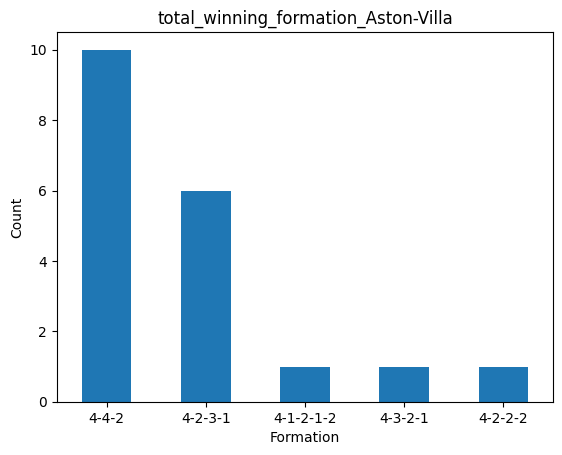

In [187]:
relation_dataframe(team_name)[total_winning_form].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=total_winning_form)


<Axes: title={'center': 'total_losing_formation_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

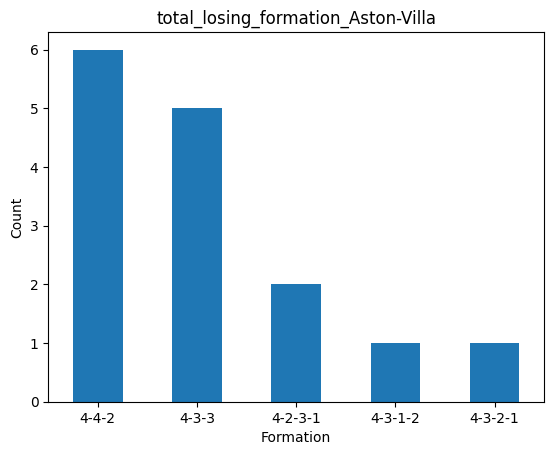

In [188]:
relation_dataframe(team_name)[total_losing_form].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=total_losing_form)


<Axes: title={'center': 'team_winning_formation_home_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

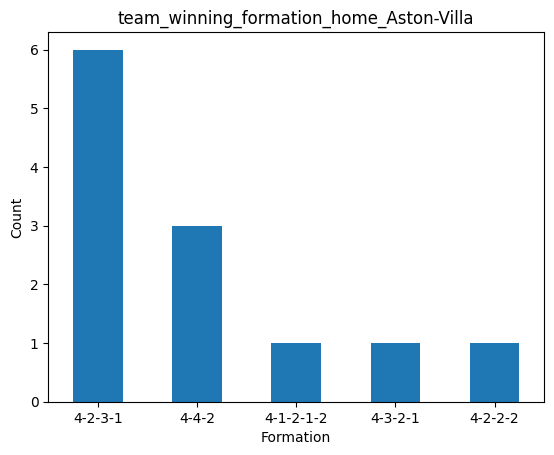

In [189]:
relation_dataframe(team_name)[team_winning_formation_home].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=team_winning_formation_home)


<Axes: title={'center': 'team_losing_formation_home_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

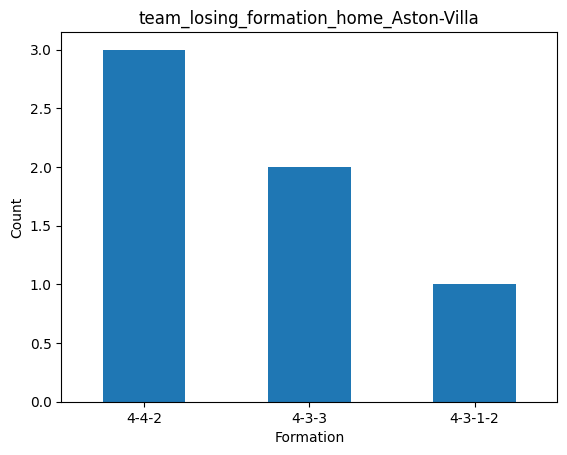

In [190]:
relation_dataframe(team_name)[team_losing_formation_home].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=team_losing_formation_home)


<Axes: title={'center': 'team_winning_formation_away_venue_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

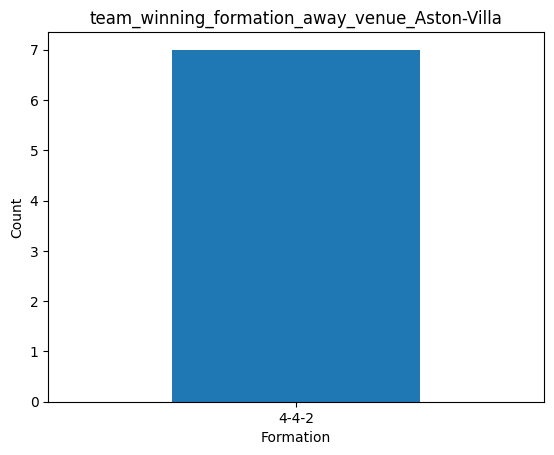

In [184]:
relation_dataframe(team_name)[team_winning_formation_away_venue].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=team_winning_formation_away_venue)

<Axes: title={'center': 'team_losing_formation_away_venue_Aston-Villa'}, xlabel='Formation', ylabel='Count'>

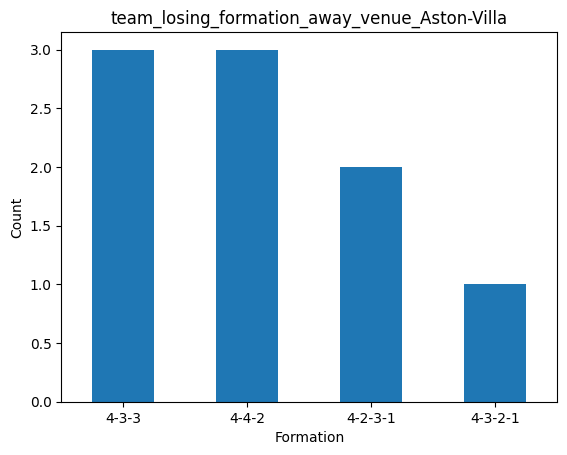

In [185]:
relation_dataframe(team_name)[team_losing_formation_away_venue].plot(kind='bar',x='Formation',y='Time', rot=0, ylabel='Count', title=team_losing_formation_away_venue)
